# Homework 3

1. We can essentially train 3 perceptrons to classify each class in order to successfully classify points into 3 classes. For example, if we have classes A, B, C, we can implement one perceptron to classify A from B and C, B from A and C, and C from A and B. For example, if we want to classify A from B and C, we assign our datapoints in class A to ahve the label of 1 and have the points in classes B and C to have a label of -1. We iterate through all points and compute the dot product with our randomly generated weights to generate our prediction, compute the error with respect to our data points actual class, multiply the error with the input vector/initialized learning rate, and add that value to our weights to get our updated weights value. After iterating through our entire dataset for a number of epochs (N-max) we have will have successfully constructed a hyperplane that can accurately classify points in class A from points in the remaining classes (B and C). We can train 3 perceptrons to essentially classify each class from the remaining, which will result in 3 hyperplanes separating the three classes on the 2D coordinate plane. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Generate 20 points in each class:

In [2]:
# Generates 20 points in any given class given the respective boundaries

def generate_points(num_points, x_min, x_max, y_min, y_max):
    x_coords = np.random.uniform(low=x_min, high=x_max, size=num_points)
    y_coords = np.random.uniform(low=y_min, high=y_max, size=num_points)
    points = np.array([(x, y) for x, y in zip(x_coords, y_coords)])
    return points

In [3]:
class1_points = generate_points(20, 2, 4, 2, 4)
class2_points = generate_points(20, 2, 4, -4, -2)
class3_points = generate_points(20, -6, -2, -2, 2)

all_points = np.concatenate((class1_points, class2_points, class3_points))

## 3. Classify points into 3 classes:

In [4]:
# This function initializes an array of the correct labels of each point based on their respective class

N = 20
def createY(N, classNum, arr): 
    arr = np.full(N*3,-1)
    arr[classNum*N - N: classNum*N] = 1
    
    return arr

In [5]:
def implement_weights(N, points, weights, epochs, learning_rate, class_number):
    y_lst = createY(N, class_number, points)
    for i in range(epochs):
        count = 0
        for x,x2 in points:
            y_pred = np.dot(np.array([x,x2, 1]), weights)
            y_pred = 1 if y_pred > 0 else -1 # assigns a label to each y-pred value (sign function)
            y = y_lst[count] # generating the correct y-label for each point
            weights += learning_rate * (y - y_pred) * np.array([x,x2, 1]).reshape(-1,1) # perceptron learning algorithm to update weights
            count += 1
    return weights.copy()

In [6]:
weights = np.random.rand(3,1) # randomly initializing weights, 3rd element is the bias term
weights = weights.astype('float64')
epochs = 500
learning_rate = 0.001
N = 20

weights_1 = implement_weights(N, all_points, weights, epochs, learning_rate, 1)
weights_2 = implement_weights(N, all_points, weights, epochs, learning_rate, 2)
weights_3 = implement_weights(N, all_points, weights, epochs, learning_rate, 3)

In [7]:
print('Hyperplane 1 weights: ', weights_1)
print('Hyperplane 2 weights: ', weights_2)
print('Hyperplane 3 weights: ', weights_3)

Hyperplane 1 weights:  [[0.34382327]
 [0.69115164]
 [0.12061954]]
Hyperplane 2 weights:  [[ 0.01857298]
 [-0.03715124]
 [-0.00938046]]
Hyperplane 3 weights:  [[-0.0127104 ]
 [-0.0078417 ]
 [-0.01938046]]


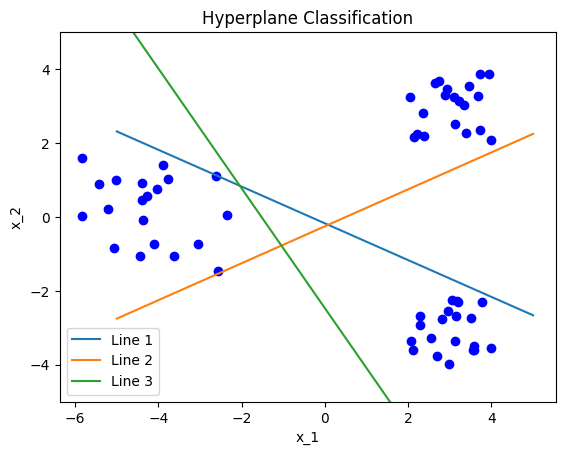

In [8]:
x_1 = np.linspace(-5, 5, 100)

for point in all_points:
    plt.scatter(point[0], point[1], color='blue')

#line 2
x_2_coef_2 = weights_2[1]
x_1_coef_2 = weights_2[0]
bias_1_2 = weights_2[2]
x_2_2 = (-x_1_coef_2 * x_1 - bias_1_2) / x_2_coef_2

#line 1
x_2_coef = weights_1[1]
x_1_coef = weights_1[0]
bias_1 = weights_1[2]
x_2 = (-x_1_coef * x_1 - bias_1) / x_2_coef

#line 3
x_2_coef_3 = weights_3[1]
x_1_coef_3 = weights_3[0]
bias_3 = weights_3[2]
x_2_3 = (-x_1_coef_3 * x_1 - bias_3) / x_2_coef_3

# Plot the lines
plt.plot(x_1, x_2, label='Line 1')
plt.plot(x_1, x_2_2, label='Line 2')
plt.plot(x_1, x_2_3, label='Line 3')

# Add labels, legend, and title to the plot
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.ylim(-5,5)
plt.title('Hyperplane Classification')
plt.legend()
plt.show()

Observations:
The lines generated successfully classify each class in the coordinate plane. I noticed that by varying the learning rate and epoch number signficantly can cause the hyperplanes to decrease in performance and fail to classify certain points in each class. I cycled through the the entire dataset 500 times (500 epochs), and found that this was the optimal number of iterations needed to result in a successful classification of all points.

## Re-Training the Perceptron Two Additional Points in Class 1

In [9]:
center_c2 = np.array([(3, -3)]) # center of c2
center_c3 = np.array([(-4, 0)]) # center of c3
class1_points = np.concatenate((class1_points, center_c2, center_c3)) # adding the two new points to class A
all_Points = np.concatenate((class1_points, class2_points, class3_points))

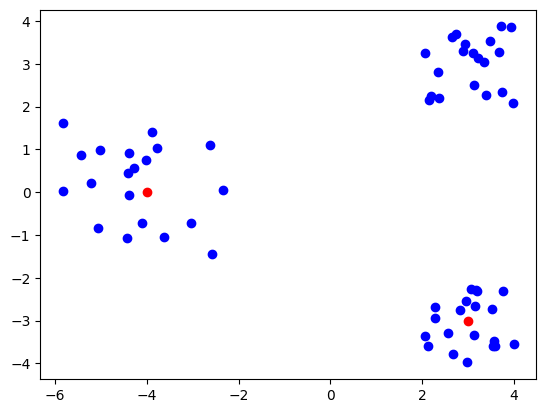

In [10]:
# plot of the new points in classified outlined in red
for x,y in all_points:
    plt.scatter(x, y, color='blue')
plt.scatter(3, -3, color='red')
plt.scatter(-4, 0, color='red')

In [11]:
# modified function to assign true labels to the dataset with two additional points

def mod_createY(N, classNum, arr): 
    arr = np.full(22 + (N * 2),-1)
    if classNum == 1:
        arr[0:22] = 1
    else: 
        arr[classNum*N - (N - 2): classNum*N + 2] = 1
    
    return arr

In [12]:
# function used to iterate through all of the points and update the weights

def mod_implement_weights(N, points, weights, epochs, learning_rate, class_number):
    y_lst = mod_createY(N, class_number, points)
    for i in range(epochs):
        count = 0
        for x,x2 in points:
            y_pred = np.dot(np.array([x,x2, 1]), weights) # predicted y-value
            y_pred = 1 if y_pred > 0 else -1 # assigning labels to the predicted y-values
            y = y_lst[count] # initializing the true labels (-1 or 1) for each point
            weights += learning_rate * (y - y_pred) * np.array([x,x2, 1]).reshape(-1,1) # perceptron learning algorithm to update weights
            count += 1
    return weights.copy()

In [13]:
weights = np.random.rand(3,1)
weights = weights.astype('float64')
epochs = 500
learning_rate = 0.001

weights_1 = mod_implement_weights(N, all_points, weights, epochs, learning_rate, 1)
weights_2 = mod_implement_weights(N, all_points, weights, epochs, learning_rate, 2)
weights_3 = mod_implement_weights(N, all_points, weights, epochs, learning_rate, 3)

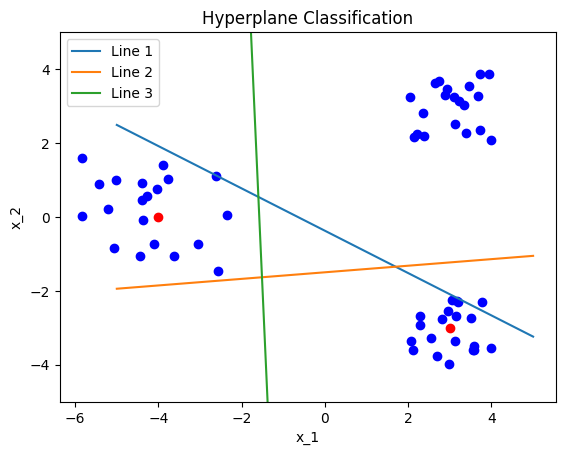

In [14]:
x_1 = np.linspace(-5, 5, 100)

for point in all_points:
    plt.scatter(point[0], point[1], color='blue')
plt.scatter(3, -3, color='red')
plt.scatter(-4, 0, color='red')

#line 2
x_2_coef_2 = weights_2[1]
x_1_coef_2 = weights_2[0]
bias_1_2 = weights_2[2]
x_2_2 = (-x_1_coef_2 * x_1 - bias_1_2) / x_2_coef_2

#line 1
x_2_coef = weights_1[1]
x_1_coef = weights_1[0]
bias_1 = weights_1[2]
x_2 = (-x_1_coef * x_1 - bias_1) / x_2_coef

#line 3
x_2_coef_3 = weights_3[1]
x_1_coef_3 = weights_3[0]
bias_3 = weights_3[2]
x_2_3 = (-x_1_coef_3 * x_1 - bias_3) / x_2_coef_3

# Plot the lines
plt.plot(x_1, x_2, label='Line 1')
plt.plot(x_1, x_2_2, label='Line 2')
plt.plot(x_1, x_2_3, label='Line 3')

# Add labels, legend, and title to the plot
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.ylim(-5,5)
plt.title('Hyperplane Classification')
plt.legend()
plt.show()

Observations: 
I noticed that each line was shifted in the direction of where the point was, which is expected since the perceptron learning algorithm aims to minimize the distance between the misclassified points and the hyperplane. However, with this learning algorithm, the hyperplanes implemented are unable to successfully classify the two additional points. Ultimately, the decision boundaries do not successfully converge to an acceptable solution. Based on the location of the two new points that are now classified in class A, a nonlinear activation function is needed to implement a more complex decision boundary to classify the two new points.

## Extra Credit 

In [15]:
class1_points = generate_points(20, 2, 4, 2, 4)
class2_points = generate_points(20, 2, 4, -4, -2)
class3_points = generate_points(20, -6, -2, -2, 2)
center_c2 = np.array([(3, -3)])
center_c3 = np.array([(-4, 0)])
class1_points = np.concatenate((class1_points, center_c2, center_c3))

all_points = np.concatenate((class1_points, class2_points, class3_points))

In [16]:
def create_weights(N, points, epochs, learning_rate, weights, class_number):
    y_arr = mod_createY(N, class_number, points)
    mse_lst = []
    for i in range(epochs):
        count = 0
        for x1,x2 in points:
            y_pred = np.dot([x1,x2,1], weights) # predicted y-value
            y = y_arr[count] # assigning true values (-1, 1) to each point
            mse_loss = (y_pred - y) ** 2 # loss value according to the MSE
            d_weights = 2 * (y_pred - y) * np.array([x1, x2, 1]) # gradient of the MSE
            weights -= learning_rate * d_weights.reshape(-1,1) # updating our weights in the negative direction of gradient
            count += 1
        mse_lst.append(mse_loss)
    return weights.copy(), mse_lst 

In [17]:
weights = np.random.rand(3,1)
weights = weights.astype('float64')
epochs = 1000
learning_rate = 0.001
N = 20

weights_1, mse_lst = create_weights(N, all_points, epochs, learning_rate, weights, 1)
weights_2, mse_lst_2 = create_weights(N, all_points, epochs, learning_rate, weights, 2)
weights_3, mse_lst_3 = create_weights(N, all_points, epochs, learning_rate, weights, 3)

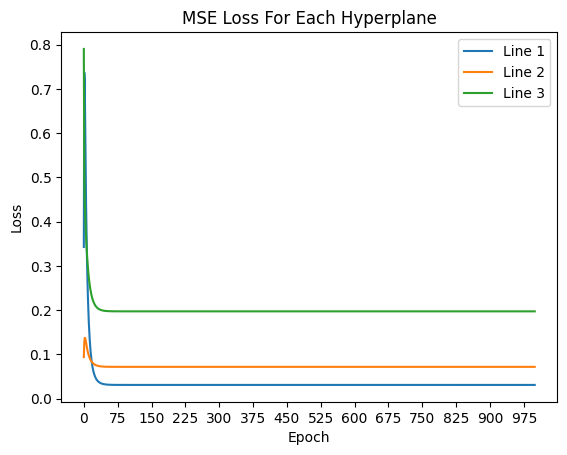

In [18]:
plt.title('MSE Loss For Each Hyperplane')
plt.plot(mse_lst, label='Line 1')
plt.plot(mse_lst_2, label='Line 2')
plt.plot(mse_lst_3, label='Line 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(np.arange(0, 1000, 75.0))
plt.legend()
plt.show()

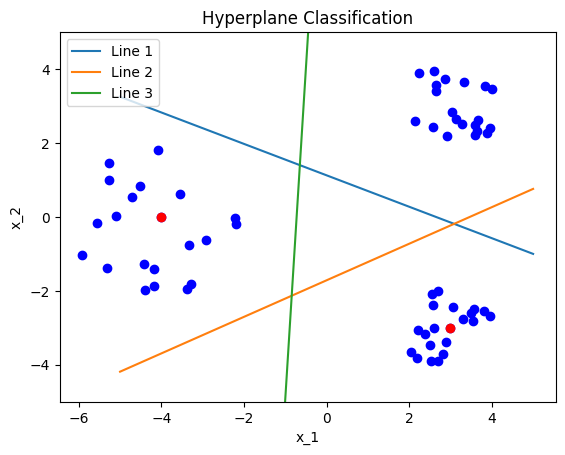

In [19]:
x_1 = np.linspace(-5, 5, 100)

for point in all_points:
    plt.scatter(point[0], point[1], color='blue')
plt.scatter(3, -3, color='red')
plt.scatter(-4, 0, color='red')

#line 2
x_2_coef_2 = weights_2[1]
x_1_coef_2 = weights_2[0]
bias_1_2 = weights_2[2]
x_2_2 = (-x_1_coef_2 * x_1 - bias_1_2) / x_2_coef_2

#line 1
x_2_coef = weights_1[1]
x_1_coef = weights_1[0]
bias_1 = weights_1[2]
x_2 = (-x_1_coef * x_1 - bias_1) / x_2_coef

#line 3
x_2_coef_3 = weights_3[1]
x_1_coef_3 = weights_3[0]
bias_3 = weights_3[2]
x_2_3 = (-x_1_coef_3 * x_1 - bias_3) / x_2_coef_3

# Plot the lines
plt.plot(x_1, x_2, label='Line 1')
plt.plot(x_1, x_2_2, label='Line 2')
plt.plot(x_1, x_2_3, label='Line 3')

# Add labels, legend, and title to the plot
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.ylim(-5,5)
plt.title('Hyperplane Classification')
plt.legend(loc = 'upper left')
plt.show()

Observations:
I noticed that using the MSE as our loss function also allowed us to successfully implement three hyperplanes to separate the points into the three classes. However, the new points added to class 1 could not be successfully classified, which can be attributed to the absence in a nonlinear activation function which would implement a more complex decision boundary. Moreover, the MSE loss function was successfully minimized but did not reach 0 (parabolic functions have a global minima the algorithm will reach), as shown in the MSE plot above, as it is not possible to classify every single point in our dataset. 